   stress_score  dummy_code
0             8           0
1             7           0
2             5           0
3             3           0
4             4           1
5             2           1
6             1           1
7             3           1

Manually calculated point-biserial correlation: -0.7189016426921303

Scipy.stats point-biserial correlation result:

PointbiserialrResult(correlation=-0.7189016426921302, pvalue=0.0444798173072321)


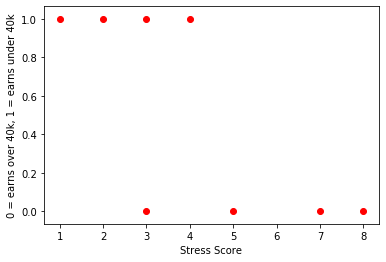

In [20]:
import pandas as pd
import statistics
import math
import scipy.stats
import matplotlib.pyplot as plt

# this example is taken from Statistics for the Behavioural Science (Gravetter and Wallnau, 2004, p.552)

# dummy coding: 0 means 'salary over 40k', 1 means 'salary under 40k'

data = {'stress_score' : [8,7,5,3,4,2,1,3], 'dummy_code' :[0,0,0,0, 1,1,1,1]}

dframe = pd.DataFrame(data)

print(dframe)

sal_ov_40K = dframe[dframe['dummy_code'] == 0]

sal_und_40k = dframe[dframe['dummy_code'] == 1]


# calculating the mean of the stress scores and the dummy variable scores

x_bar = statistics.mean(dframe.iloc[:,0])

y_bar = statistics.mean(dframe.iloc[:,1])


# calculating the sum of products

sp = []

count = 0
for i in dframe.iloc[:,0]:
    sp.append((dframe.iloc[count, 0]-x_bar) * (dframe.iloc[count, 1] - y_bar))
    count = count + 1
    
sp = sum(sp)

# calculating the sum of squares for the stress scores and the dummy variable scores

sum_sq_x = []
count = 0
for i in dframe.iloc[:,0]:
    sum_sq_x.append((dframe.iloc[count,0] - x_bar)**2)
    count = count+1

sum_sq_x = sum(sum_sq_x)

sum_sq_y = []
count = 0
for i in dframe.iloc[:,1]:
    sum_sq_y.append((dframe.iloc[count,1] - y_bar)**2)
    count = count+1

sum_sq_y = sum(sum_sq_y)

# calculating the point-biserial correlation 

point_biserial = sp/math.sqrt(sum_sq_x*sum_sq_y)

print()
print('Manually calculated point-biserial correlation:', point_biserial)
print()

# checking the results with scipy.stats.pointbiserialr

result = scipy.stats.pointbiserialr(dframe.iloc[:,0], dframe.iloc[:,1])

print('Scipy.stats point-biserial correlation result:')
print()
print(result)

plt.scatter(dframe.iloc[:,0], dframe.iloc[:,1], color = 'red')
plt.xlabel('Stress Score')
plt.ylabel('0 = earns over 40k, 1 = earns under 40k')
plt.show()